## 信用卡詐欺

### 資料下載

In [1]:
! wget https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/creditcardfraud.zip

--2020-08-22 01:58:24--  https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/creditcardfraud.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71387154 (68M) [application/zip]
Saving to: ‘creditcardfraud.zip’

creditcardfraud.zip 100%[===================>]  68.08M   270MB/s    in 0.3s    

2020-08-22 01:58:27 (270 MB/s) - ‘creditcardfraud.zip’ saved [71387154/71387154]



In [2]:
! unzip creditcardfraud.zip > 1.log

In [3]:
! ls

1.log  creditcard.csv  creditcardfraud.zip  sample_data


### 讀取資料

In [4]:
import pandas
df = pandas.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### EDA (Exploratory Data Analysis)

In [7]:
count_classes = pandas.value_counts(df['Class'], sort = True)

In [8]:
count_classes

0    284315
1       492
Name: Class, dtype: int64

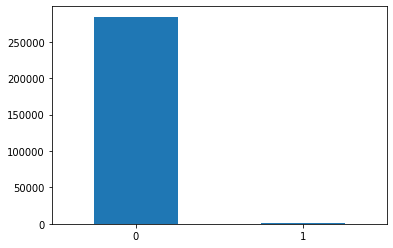

In [9]:
count_classes.plot(kind = 'bar', rot=0)

In [10]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

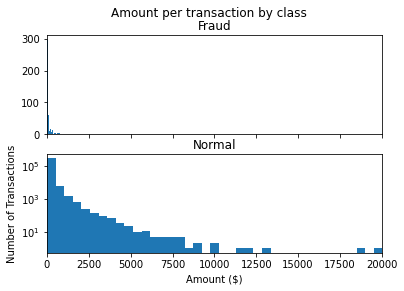

In [12]:
from matplotlib import pyplot as plt
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

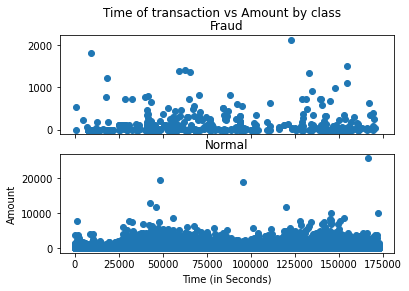

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### 標準化資料

In [14]:
from sklearn.preprocessing import StandardScaler
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [15]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### 將資料分為訓練與測試資料集

In [16]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
X_train.shape

(227845, 29)

In [20]:
X_test.shape

(56962, 29)

### 跑 ANN

In [21]:
% tensorflow_version 2.x

In [24]:
import tensorflow
import tensorflow as tf


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(14, activation = 'relu', input_shape=(29,)))
model.add(Dropout(rate=0.1))
model.add(Dense(14, activation = 'relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 14)                420       
_________________________________________________________________
dropout_2 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 14)                210       
_________________________________________________________________
dropout_3 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 15        
Total params: 645
Trainable params: 645
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam', metrics = ['accuracy'], loss = 'binary_crossentropy')

In [ ]:
model.fit(X_train, y_train, 
    epochs = 100,
    validation_data=(X_test, y_test))

In [43]:
y_pred = (model.predict(X_test) > 0.5).flatten().astype(int)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.999385555282469

In [46]:
confusion_matrix(y_test, y_pred)

array([[56851,    13],
       [   22,    76]])

### Autoencoders

In [48]:
X_train = X_train[y_train ==0]

In [49]:

input_dim = X_train.shape[1]

In [50]:
input_dim

29

In [51]:
encoding_dim = 14

In [56]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from tensorflow.keras import regularizers
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(7, activation="relu")(encoder)

decoder = Dense(7, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [59]:
from keras.callbacks import ModelCheckpoint
nb_epoch = 10
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer]).history

Epoch 1/10
7108/7108 [==============================] - 11s 2ms/step - loss: 0.8223 - accuracy: 0.5735 - val_loss: 0.7787 - val_accuracy: 0.6792
Epoch 2/10
7108/7108 [==============================] - 11s 2ms/step - loss: 0.7371 - accuracy: 0.6904 - val_loss: 0.7590 - val_accuracy: 0.6981
Epoch 3/10
7108/7108 [==============================] - 11s 2ms/step - loss: 0.7240 - accuracy: 0.6964 - val_loss: 0.7510 - val_accuracy: 0.6993
Epoch 4/10
7108/7108 [==============================] - 11s 2ms/step - loss: 0.7170 - accuracy: 0.7030 - val_loss: 0.7476 - val_accuracy: 0.7042
Epoch 5/10
7108/7108 [==============================] - 11s 2ms/step - loss: 0.7134 - accuracy: 0.7074 - val_loss: 0.7434 - val_accuracy: 0.7140
Epoch 6/10
7108/7108 [==============================] - 11s 2ms/step - loss: 0.7115 - accuracy: 0.7097 - val_loss: 0.7433 - val_accuracy: 0.7188
Epoch 7/10
7108/7108 [==============================] - 11s 2ms/step - loss: 0.7094 - accuracy: 0.7135 - val_loss: 0.7409 - val_ac

### 評估模型

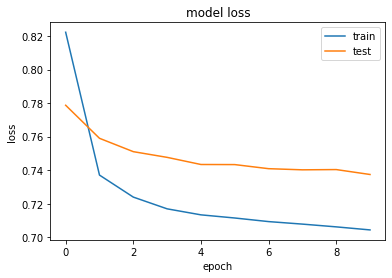

In [60]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [61]:
predictions = autoencoder.predict(X_test)

In [65]:
predictions.shape

(56962, 29)

In [67]:
import numpy as np
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pandas.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [68]:
error_df

,reconstruction_error,true_class
43428,80.774561,1
49906,0.754743,0
29474,0.229801,0
276481,0.378687,0
278846,0.171890,0
...,...,...
75723,0.639550,0
252263,0.203675,0
221246,0.531668,0
81910,0.152339,0


In [69]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

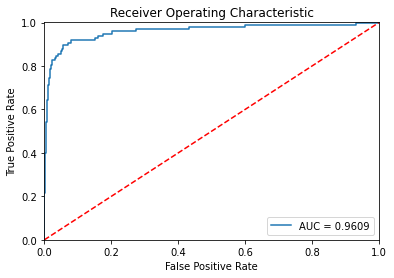

In [70]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [134]:
threshold = 1.063395
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
conf_matrix

array([[52136,  4728],
       [    8,    90]])

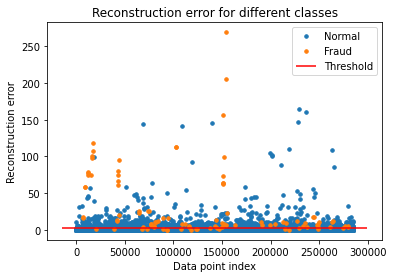

In [72]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

In [130]:
i = np.arange(len(tpr)) 
roc = pandas.DataFrame(
    {'fpr'   : pandas.Series(fpr, index=i),
     'tpr'   : pandas.Series(tpr, index = i), 
     '1-fpr' : pandas.Series(1-fpr, index = i), 
     'tf'    : pandas.Series(tpr - (1-fpr), index = i), 
     'thresholds' : pandas.Series(thresholds, index = i)})

In [132]:
roc['tf'].abs().argsort()

0        157
1        158
2        156
3        155
4        159
        ... 
1008    1009
1009    1010
1010    1011
1011       0
1012    1012
Name: tf, Length: 1013, dtype: int64

In [133]:
roc.loc[(roc.tf-0).abs().argsort()[0]]

fpr           0.083163
tpr           0.918367
1-fpr         0.916837
tf            0.001531
thresholds    1.063395
Name: 157, dtype: float64

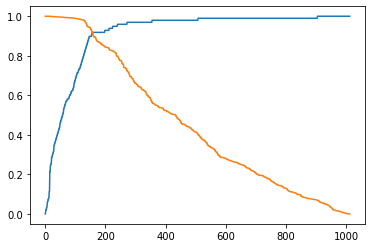

In [141]:
plt.plot(range(len(roc)), roc['tpr']);
plt.plot(range(len(roc)), roc['1-fpr'])

## Leaky ReLU

In [82]:
def relu_function(x):
  return np.maximum(0,x)
a = np.array([-1,1,2])
relu_function(a)

array([0, 1, 2])

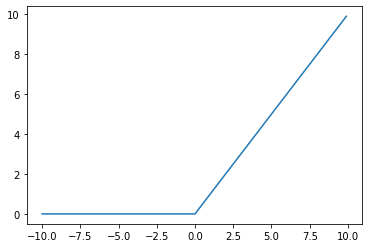

In [83]:
x = np.arange(-10,10,0.1)
plt.plot(x, relu_function(x))

In [84]:
def leaky_relu(z, alpha =0.01):
  return np.maximum(z, alpha * z)

leaky_relu(a)

array([-0.01,  1.  ,  2.  ])

## Over saturation

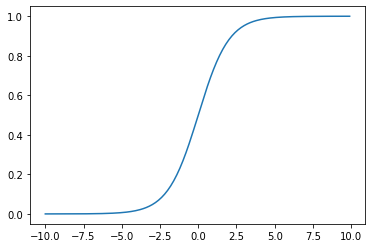

In [90]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
x = np.arange(-10,10,0.1)
plt.plot(x, sigmoid(x))

In [94]:
x1 = np.array([-1000,-100,-10,-1,1,10,100, 1000])
sigmoid(x1)

sigmoid((x1 - x1.mean()) / x1.std())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([0.12025952, 0.45041415, 0.49502523, 0.49950251, 0.50049749,
       0.50497477, 0.54958585, 0.87974048])

## GAN

In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

In [81]:
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

latent_dim = 100

In [85]:
def build_discriminator():

    model = Sequential()

    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    img = Input(shape=img_shape)
    validity = model(img)

    return Model(img, validity)

In [86]:
optimizer = Adam(0.0002, 0.5)

# Build and compile the discriminator
discriminator = build_discriminator()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [87]:
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

In [95]:
def build_generator():

    model = Sequential()

    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))

    model.summary()

    noise = Input(shape=(latent_dim,))
    img = model(noise)

    return Model(noise, img)

In [96]:
# Build the generator
generator = build_generator()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_21 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_22 (Dense)             (None, 1024)             

In [97]:
z = Input(shape=(latent_dim,))
img = generator(z)
img.shape

TensorShape([None, 28, 28, 1])

In [98]:
# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
validity = discriminator(img)

# The combined model  (stacked generator and discriminator)
# Trains the generator to fool the discriminator
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

In [102]:
def sample_images(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("/content/images/%d.png" % epoch)
    plt.close()

In [103]:
def train(epochs, batch_size=128, sample_interval=50):

    # Load the dataset
    (X_train, _), (_, _) = mnist.load_data()

    # Rescale -1 to 1
    X_train = X_train / 127.5 - 1.
    X_train = np.expand_dims(X_train, axis=3)

    # Adversarial ground truths
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):

        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Select a random batch of images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Generate a batch of new images
        gen_imgs = generator.predict(noise)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator
        # ---------------------

        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Train the generator (to have the discriminator label samples as valid)
        g_loss = combined.train_on_batch(noise, valid)

        # Plot the progress
        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

        # If at save interval => save generated image samples
        if epoch % sample_interval == 0:
            sample_images(epoch)


In [104]:
! rm -rf /content/images
! mkdir /content/images

In [ ]:

train(1000, batch_size=128, sample_interval=50)

In [125]:
n1 = np.random.normal(0, 1, (1, latent_dim))

In [126]:
#n1

In [127]:
gen_imgs = generator.predict(n1)

In [128]:
gen_imgs = 0.5 * gen_imgs + 0.5

   

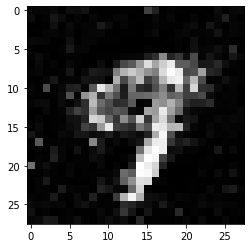

In [129]:

plt.imshow(gen_imgs[0, :,:,0], cmap='gray')

## CelebA

In [2]:
! gdown https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM

Permission denied: https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM
Maybe you need to change permission over 'Anyone with the link'?


In [143]:
! unzip img_align_celeba.zip > 1.log

## DCGAN

In [10]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

In [ ]:
class DCGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 128)))
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, save_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake images as real)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)

    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/mnist_%d.png" % epoch)
        plt.close()


dcgan = DCGAN()
dcgan.train(epochs=4000, batch_size=32, save_interval=50)

## 明星圖片生成

In [11]:
def load_dataset(dataset_path, batch_size, image_shape):
    dataset_generator = ImageDataGenerator()
    dataset_generator = dataset_generator.flow_from_directory(
        dataset_path, target_size=(image_shape[0], image_shape[1]),
        batch_size=batch_size,
        class_mode=None)

    return dataset_generator

In [12]:
def build_generator():

    model = Sequential()

    model.add(Dense(units=4 * 4 * 512,
                   input_shape=(1, 1, 100)))
    model.add(Reshape(target_shape=(4, 4, 512)))
    model.add(BatchNormalization(momentum=0.5))
    model.add(Activation('relu'))

    model.add(Conv2DTranspose(filters=256, kernel_size=(5, 5),
                                  strides=(2, 2), padding='same'))
    model.add(BatchNormalization(momentum=0.5))
    model.add(Activation('relu'))

    model.add(Conv2DTranspose(filters=128, kernel_size=(5, 5),
                                  strides=(2, 2), padding='same'))
    model.add(BatchNormalization(momentum=0.5))
    model.add(Activation('relu'))

    model.add(Conv2DTranspose(filters=64, kernel_size=(5, 5),
                                  strides=(2, 2), padding='same'))
    model.add(BatchNormalization(momentum=0.5))
    model.add(Activation('relu'))

    model.add(Conv2DTranspose(filters=3, kernel_size=(5, 5),
                                  strides=(2, 2), padding='same'))
    model.add(Activation('tanh'))
    model.summary()
    optimizer = Adam(lr=0.00015, beta_1=0.5)
    model.compile(loss='binary_crossentropy',
                      optimizer=optimizer,
                      metrics=None)

    return model

In [13]:
def build_discriminator():

    model = Sequential()
    
    image_shape = (64, 64, 3)
    model.add(Conv2D(filters=64, kernel_size=(5, 5),
                             strides=(2, 2), padding='same',
                             input_shape=(image_shape)))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(filters=128, kernel_size=(5, 5),
                             strides=(2, 2), padding='same'))
    model.add(BatchNormalization(momentum=0.5))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(filters=256, kernel_size=(5, 5),
                             strides=(2, 2), padding='same'))
    model.add(BatchNormalization(momentum=0.5))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(filters=512, kernel_size=(5, 5),
                             strides=(2, 2), padding='same'))
    model.add(BatchNormalization(momentum=0.5))
    model.add(LeakyReLU(0.2))

    model.add(Flatten())
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()

    optimizer = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy',
                          optimizer=optimizer,
                          metrics=None)

    return model

In [14]:
def sample_images(generated_images, epoch):

    plt.figure(figsize=(8, 8), num=2)
    gs1 = gridspec.GridSpec(8, 8)
    gs1.update(wspace=0, hspace=0)

    for i in range(generated_images.shape[0]):
        ax1 = plt.subplot(gs1[i])
        ax1.set_aspect('equal')
        image = generated_images[i, :, :, :]
        image += 1
        image *= 127.5
        fig = plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)

    plt.tight_layout()
    save_name = 'images/generatedSamples_epoch' + str(
        epoch + 1) + '.png'

    plt.savefig(save_name, bbox_inches='tight', pad_inches=0)
    plt.pause(0.0000000001)
    plt.show()

In [18]:
from keras.layers import Conv2D, Conv2DTranspose, Reshape
generator = build_generator()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1, 1, 8192)        827392    
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 4, 4, 512)         2048      
_________________________________________________________________
activation_5 (Activation)    (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
activation_6 (Activation)    (None, 8, 8, 256)        

In [19]:
discriminator = build_discriminator()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         819456    
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 256)        

In [ ]:
! unzip celeba.zip

In [23]:
! mkdir celeba/train

In [24]:
! mv celeba/*.jpg celeba/train/

In [25]:
dataset_path = 'celeba'
batch_size   =  64
image_shape  = (64, 64, 3)
from keras.preprocessing.image import ImageDataGenerator
dataset_generator = load_dataset(dataset_path, batch_size, image_shape)

Found 9521 images belonging to 1 classes.


In [26]:

number_of_batches  = int(dataset_generator.samples / batch_size)
adversarial_loss   = np.empty(shape=1)
discriminator_loss = np.empty(shape=1)
epochs = 250

In [27]:
gan = Sequential()

discriminator.trainable = False
gan.add(generator)
gan.add(discriminator)

optimizer = Adam(lr=0.00015, beta_1=0.5)
gan.compile(loss='binary_crossentropy', optimizer=optimizer,
                    metrics=None)

In [28]:
import os
if not os.path.exists('models'):
    os.mkdir('models')

In [ ]:
import time
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

for epoch in range(epochs):
    print("Epoch {} / {}:".format(epoch+1, epochs))

    for batch_number in range(number_of_batches):
        # 取得一批图片数据
        real_images = dataset_generator.next()
        # 将图片标准化至-1到1
        real_images = real_images / 127.5 - 1.

        # 每批大小不同，需每次计算该批数据量
        current_batch_size = real_images.shape[0]

        # 产生噪音
        noise = np.random.normal(0, 1, size=(current_batch_size,) + (1, 1, 100))

        # 使用生成器生成图片
        generated_images = generator.predict(noise)

        # 增加噪音扰乱鉴别器
        real_y = (np.ones(current_batch_size) - np.random.random_sample(current_batch_size) * 0.2)
        fake_y = np.random.random_sample(current_batch_size) * 0.2

        # 训练鉴别器
        discriminator.trainable = True

        d_loss = discriminator.train_on_batch(real_images, real_y)
        d_loss += discriminator.train_on_batch(generated_images, fake_y)

        discriminator_loss = np.append(discriminator_loss, d_loss)

        # 训练生成器
        discriminator.trainable = False

        noise = np.random.normal(0, 1,size=(current_batch_size * 2,) +(1, 1, 100))

        # 给予反向标签以误导鉴别器
        fake_y = (np.ones(current_batch_size * 2) -
                      np.random.random_sample(current_batch_size * 2) * 0.2)

        g_loss = gan.train_on_batch(noise, fake_y)
        adversarial_loss = np.append(adversarial_loss, g_loss)
    

        # 打印损失
        print(" generator loss {} | discriminator loss {} ".format(g_loss, d_loss))


    # 存储模型与生成图片
    if (epoch + 1) % 3 == 0:
        discriminator.trainable = True
        generator.save('models/generator_epoch' + str(epoch) + '.hdf5')
        discriminator.save('models/discriminator_epoch' +str(epoch) + '.hdf5')
        
        sample_images(generated_images, epoch)

## Cycle GAN

In [139]:
! pip install scipy==1.2.1

     |████████████████████████████████| 24.8MB 130kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.2.1 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.2.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [44]:
% tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [45]:
! pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-wizg8j3e
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-wizg8j3e
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=a102f11ed3d41a3237d9474bff5f20eb7ffdd75d065d8e2d6d5743e178bfe759
  Stored in directory: /tmp/pip-ephem-wheel-cache-581kfzln/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [46]:
from keras_contrib.layers.normalization import instancenormalization

In [47]:
import scipy

from keras.datasets import mnist
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import datetime
import matplotlib.pyplot as plt
import sys
import numpy as np
import os

In [140]:
from glob import glob
import numpy as np
import scipy.misc
from skimage import io

class DataLoader():
    def __init__(self, dataset_name, img_res=(128, 128)):
        self.dataset_name = dataset_name
        self.img_res = img_res

    def load_data(self, domain, batch_size=1, is_testing=False):
        data_type = "train%s" % domain if not is_testing else "test%s" % domain
        path = glob('./datasets/%s/%s/*' % (self.dataset_name, data_type))
        #print(path)
        batch_images = np.random.choice(path, size=batch_size)

        imgs = []
        for img_path in batch_images:
            img = self.imread(img_path)
            if not is_testing:
                img = scipy.misc.imresize(img, self.img_res)

                if np.random.random() > 0.5:
                    img = np.fliplr(img)
            else:
                img = scipy.misc.imresize(img, self.img_res)
            imgs.append(img)

        imgs = np.array(imgs)/127.5 - 1.

        return imgs

    def load_batch(self, batch_size=1, is_testing=False):
        data_type = "train" if not is_testing else "val"
        path_A = glob('./datasets/%s/%sA/*' % (self.dataset_name, data_type))
        path_B = glob('./datasets/%s/%sB/*' % (self.dataset_name, data_type))
        #print(path_A)
        self.n_batches = int(min(len(path_A), len(path_B)) / batch_size)
        total_samples = self.n_batches * batch_size

        # Sample n_batches * batch_size from each path list so that model sees all
        # samples from both domains
        path_A = np.random.choice(path_A, total_samples, replace=False)
        path_B = np.random.choice(path_B, total_samples, replace=False)

        for i in range(self.n_batches-1):
            batch_A = path_A[i*batch_size:(i+1)*batch_size]
            batch_B = path_B[i*batch_size:(i+1)*batch_size]
            imgs_A, imgs_B = [], []
            for img_A, img_B in zip(batch_A, batch_B):
                img_A = self.imread(img_A)
                img_B = self.imread(img_B)

                img_A = scipy.misc.imresize(img_A, self.img_res)
                img_B = scipy.misc.imresize(img_B, self.img_res)

                if not is_testing and np.random.random() > 0.5:
                        img_A = np.fliplr(img_A)
                        img_B = np.fliplr(img_B)

                imgs_A.append(img_A)
                imgs_B.append(img_B)

            imgs_A = np.array(imgs_A)/127.5 - 1.
            imgs_B = np.array(imgs_B)/127.5 - 1.

            yield imgs_A, imgs_B

    def load_img(self, path):
        img = self.imread(path)
        img = scipy.misc.imresize(img, self.img_res)
        img = img/127.5 - 1.
        return img[np.newaxis, :, :, :]

    def imread(self, path):
        return scipy.misc.imread(path, mode='RGB').astype(np.float)

In [117]:
! wget https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/monet2photo.zip

--2020-08-22 07:01:57--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/monet2photo.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305231073 (291M) [application/zip]
Saving to: ‘monet2photo.zip.1’

monet2photo.zip.1     0%[                    ]  40.00K   131KB/s               ^C


In [ ]:
! unzip monet2photo.zip

In [91]:
! mv monet2photo datasets

In [102]:
! mkdir datasets/monet2photo
! mv datasets/trainA datasets/monet2photo
! mv datasets/trainB datasets/monet2photo
! mv datasets/testA datasets/monet2photo
! mv datasets/testB datasets/monet2photo

In [129]:
a = DataLoader('monet2photo')

In [135]:
# 图片参数
img_rows = 128
img_cols = 128
channels = 3
img_shape = (img_rows, img_cols, channels)
dataset_name = 'monet2photo'
data_loader = DataLoader(dataset_name=dataset_name,
             img_res=(img_rows, img_cols))

In [136]:
def build_generator():
    """U-Net Generator"""

    def conv2d(layer_input, filters, f_size=4):
        """Layers used during downsampling"""
        d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
        d = LeakyReLU(alpha=0.2)(d)
        d = InstanceNormalization()(d)
        return d

    def deconv2d(layer_input, skip_input, filters, f_size=4, dropout_rate=0):
        """Layers used during upsampling"""
        u = UpSampling2D(size=2)(layer_input)
        u = Conv2D(filters, kernel_size=f_size, strides=1, padding='same', activation='relu')(u)
        if dropout_rate:
            u = Dropout(dropout_rate)(u)
        u = InstanceNormalization()(u)
        u = Concatenate()([u, skip_input])
        return u

    # Image input
    d0 = Input(shape=img_shape)

    # Downsampling
    d1 = conv2d(d0, gf)
    d2 = conv2d(d1, gf*2)
    d3 = conv2d(d2, gf*4)
    d4 = conv2d(d3, gf*8)

    # Upsampling
    u1 = deconv2d(d4, d3, gf*4)
    u2 = deconv2d(u1, d2, gf*2)
    u3 = deconv2d(u2, d1, gf)

    u4 = UpSampling2D(size=2)(u3)
    output_img = Conv2D(channels, kernel_size=4, strides=1, padding='same', activation='tanh')(u4)

    return Model(d0, output_img)

In [137]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
def build_discriminator():

    def d_layer(layer_input, filters, f_size=4, normalization=True):
        """Discriminator layer"""
        d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
        d = LeakyReLU(alpha=0.2)(d)
        if normalization:
            d = InstanceNormalization()(d)
        return d

    img = Input(shape=img_shape)

    d1 = d_layer(img, df, normalization=False)
    d2 = d_layer(d1, df*2)
    d3 = d_layer(d2, df*4)
    d4 = d_layer(d3, df*8)

    validity = Conv2D(1, kernel_size=4, strides=1, padding='same')(d4)
    return Model(img, validity)

In [108]:
def train(epochs, batch_size=1, sample_interval=50):

    start_time = datetime.datetime.now()

    # Adversarial loss ground truths
    valid = np.ones((batch_size,) + disc_patch)
    fake = np.zeros((batch_size,) + disc_patch)

    for epoch in range(epochs):
        print(epoch)
        for batch_i, (imgs_A, imgs_B) in enumerate(data_loader.load_batch(batch_size)):

            # ----------------------
            #  Train Discriminators
            # ----------------------

            # Translate images to opposite domain
            fake_B = g_AB.predict(imgs_A)
            fake_A = g_BA.predict(imgs_B)

            # Train the discriminators (original images = real / translated = Fake)
            dA_loss_real = d_A.train_on_batch(imgs_A, valid)
            dA_loss_fake = d_A.train_on_batch(fake_A, fake)
            dA_loss = 0.5 * np.add(dA_loss_real, dA_loss_fake)

            dB_loss_real = d_B.train_on_batch(imgs_B, valid)
            dB_loss_fake = d_B.train_on_batch(fake_B, fake)
            dB_loss = 0.5 * np.add(dB_loss_real, dB_loss_fake)

            # Total disciminator loss
            d_loss = 0.5 * np.add(dA_loss, dB_loss)


            # ------------------
            #  Train Generators
            # ------------------

            # Train the generators
            g_loss = combined.train_on_batch([imgs_A, imgs_B],
                              [valid, valid,
                              imgs_A, imgs_B,
                              imgs_A, imgs_B])

            elapsed_time = datetime.datetime.now() - start_time

            # Plot the progress
            print ("[Epoch %d/%d] [Batch %d/%d] [D loss: %f, acc: %3d%%] [G loss: %05f, adv: %05f, recon: %05f, id: %05f] time: %s " \
                                                                    % ( epoch, epochs,
                                                                        batch_i, data_loader.n_batches,
                                                                        d_loss[0], 100*d_loss[1],
                                                                        g_loss[0],
                                                                        np.mean(g_loss[1:3]),
                                                                        np.mean(g_loss[3:5]),
                                                                        np.mean(g_loss[5:6]),
                                                                        elapsed_time))

            # If at save interval => save generated image samples
            if batch_i % sample_interval == 0:
                sample_images(epoch, batch_i)

In [98]:
def sample_images(epoch, batch_i):
    os.makedirs('images/%s' % dataset_name, exist_ok=True)
    r, c = 2, 3

    imgs_A = data_loader.load_data(domain="A", batch_size=1, is_testing=True)
    imgs_B = data_loader.load_data(domain="B", batch_size=1, is_testing=True)
    print(img_A)
    # Demo (for GIF)
    #imgs_A = data_loader.load_img('datasets/apple2orange/testA/n07740461_1541.jpg')
    #imgs_B = data_loader.load_img('datasets/apple2orange/testB/n07749192_4241.jpg')

    # Translate images to the other domain
    fake_B = g_AB.predict(imgs_A)
    fake_A = g_BA.predict(imgs_B)
    # Translate back to original domain
    reconstr_A = g_BA.predict(fake_B)
    reconstr_B = g_AB.predict(fake_A)

    gen_imgs = np.concatenate([imgs_A, fake_B, reconstr_A, imgs_B, fake_A, reconstr_B])

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    titles = ['Original', 'Translated', 'Reconstructed']
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt])
            axs[i, j].set_title(titles[j])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("images/%s/%d_%d.png" % (dataset_name, epoch, batch_i))
    plt.close()

In [99]:
# Calculate output shape of D (PatchGAN)
patch = int(img_rows / 2**4)
disc_patch = (patch, patch, 1)

# Number of filters in the first layer of G and D
gf = 32
df = 64

# Loss weights
lambda_cycle = 10.0                    # Cycle-consistency loss
lambda_id = 0.1 * lambda_cycle    # Identity loss

optimizer = Adam(0.0002, 0.5)

# Build and compile the discriminators
d_A = build_discriminator()
d_B = build_discriminator()
d_A.compile(loss='mse',
    optimizer=optimizer,
    metrics=['accuracy'])
d_B.compile(loss='mse',
    optimizer=optimizer,
    metrics=['accuracy'])

In [100]:
#-------------------------
# Construct Computational
#   Graph of Generators
#-------------------------

# Build the generators
g_AB = build_generator()
g_BA = build_generator()

# Input images from both domains
img_A = Input(shape=img_shape)
img_B = Input(shape=img_shape)

# Translate images to the other domain
fake_B = g_AB(img_A)
fake_A = g_BA(img_B)
# Translate images back to original domain
reconstr_A = g_BA(fake_B)
reconstr_B = g_AB(fake_A)
# Identity mapping of images
img_A_id = g_BA(img_A)
img_B_id = g_AB(img_B)

# For the combined model we will only train the generators
d_A.trainable = False
d_B.trainable = False

# Discriminators determines validity of translated images
valid_A = d_A(fake_A)
valid_B = d_B(fake_B)

# Combined model trains generators to fool discriminators
combined = Model(inputs=[img_A, img_B],
                      outputs=[ valid_A, valid_B,
                                reconstr_A, reconstr_B,
                                img_A_id, img_B_id ])
combined.compile(loss=['mse', 'mse',
                       'mae', 'mae',
                       'mae', 'mae'],
                    loss_weights=[  1, 1,
                                    lambda_cycle, lambda_cycle,
                                    lambda_id, lambda_id ],
                    optimizer=optimizer)

In [101]:
train(epochs=20, batch_size=10, sample_interval=10)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


## Pretained Model

In [142]:
! git clone https://github.com/junyanz/CycleGAN

Cloning into 'CycleGAN'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 413 (delta 4), reused 3 (delta 2), pack-reused 404
Receiving objects: 100% (413/413), 12.54 MiB | 1.98 MiB/s, done.
Resolving deltas: 100% (232/232), done.


In [144]:
! cd CycleGAN ; bash ./datasets/download_dataset.sh ae_photos

for details.

--2020-08-22 07:08:39--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/ae_photos.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10678242 (10M) [application/zip]
Saving to: ‘./datasets/ae_photos.zip’

./datasets/ae_photo 100%[===================>]  10.18M  6.63MB/s    in 1.5s    

2020-08-22 07:08:41 (6.63 MB/s) - ‘./datasets/ae_photos.zip’ saved [10678242/10678242]

Archive:  ./datasets/ae_photos.zip
   creating: ./datasets/ae_photos/testA/
  inflating: ./datasets/ae_photos/testA/Venice 030.jpg  
  inflating: ./datasets/ae_photos/testA/33.jpg  
  inflating: ./datasets/ae_photos/testA/IMG_20170305_174233848_HDR.jpg  
  inflating: ./datasets/ae_photos/testA/IMG_5582.jpg  
  inflating: ./datasets/ae_photos/testA/IMG_5045(1).jpg  
  inflating: ./datasets/ae_photos/testA/

In [148]:
%cd CycleGAN
! bash ./pretrained_models/download_model.sh style_cezanne

/content/CycleGAN
Note: available models are apple2orange, facades_photo2label, map2sat, orange2apple, style_cezanne, style_ukiyoe,  summer2winter_yosemite, zebra2horse, facades_label2photo, horse2zebra,monet2photo, sat2map, style_monet,style_vangogh, winter2summer_yosemite, iphone2dslr_flower
Specified [style_cezanne]
for details.

--2020-08-22 07:10:05--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/models/style_cezanne.t7
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027270 (22M)
Saving to: ‘./checkpoints/style_cezanne_pretrained/latest_net_G.t7’

./checkpoints/style 100%[===================>]  21.96M  9.60MB/s    in 2.3s    

2020-08-22 07:10:08 (9.60 MB/s) - ‘./checkpoints/style_cezanne_pretrained/latest_net_G.t7’ saved [23027270/23027270]



In [ ]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

In [150]:
%cd /content/CycleGAN
! DATA_ROOT=./datasets/ae_photos name=style_cezanne_pretrained model=one_direction_test phase=test loadSize=256 fineSize=256 resize_or_crop="scale_width" th test.lua

/content/CycleGAN
/bin/bash: th: command not found
